The dataset used  captures a wide range of customer attributes including age, gender, purchase history, preferred payment methods, frequency of purchases, and more. Analyzing this data can help businesses make informed decisions, optimize product offerings, and enhance customer satisfaction.

Dataset Glossary (Column-wise)

Customer ID - Unique identifier for each customer

Age - Age of the customer

Gender - Gender of the customer (Male/Female)

Item Purchased - The item purchased by the customer

Category - Category of the item purchased

Purchase Amount (USD) - The amount of the purchase in USD

Location - Location where the purchase was made

Size - Size of the purchased item

Color - Color of the purchased item

Season - Season during which the purchase was made

Review Rating - Rating given by the customer for the purchased item

Subscription Status - Indicates if the customer has a subscription (Yes/No)

Payment Method - Preferred payment method of the customer

Shipping Type - Type of shipping chosen by the customer

Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)

Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)

Previous Purchases - Number of previous purchases made by the customer

Preferred Payment Method - Customer's most preferred payment method

Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

Goal Take 3 main insights from this data.

In [72]:

# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [73]:
# reading data from csv file using padas
df = pd.read_csv("shopping_trends_updated.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


As promised by the creater of the csv file, there are no missing values, so we don't need to cleanse the data.

**Visualization 1: Customer Spending Analysis**

Variables:

Gender

Purchase Amount (USD)

Visualization Used:

Bar Chart

Explanation:

Through a bar chart, we'll visualize and compare the average purchase amounts across different genders. Here:

The X-axis represents different genders. The Y-axis represents the average purchase amount (USD).

In [74]:
# Data Aggregation
avg_purchase = df.groupby('Gender')['Purchase Amount (USD)'].mean()


TypeError: 'str' object is not callable

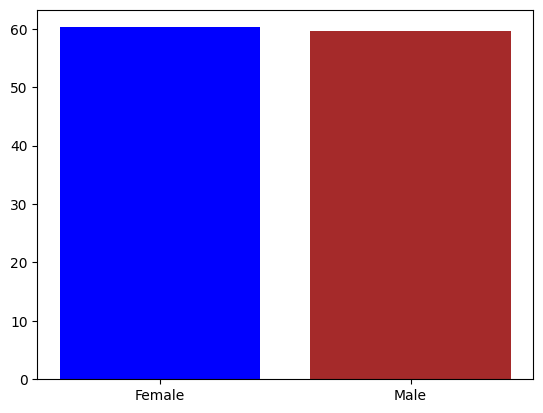

In [75]:
# creating visualization
plt.bar(avg_purchase.index, avg_purchase.values, color=['blue', 'brown'])
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase Amount by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights
On comparision of the heights of the bars, we can discern the difference between spending patterns between two genders.

It seems as if the average purchase amount is slightly higher in females than males using given data.

**Visualization 2: Relationship Between Location and Items Purchased**

Variables:

Location

Item Purchased

Visualization Used:

Treemap

Explanation:

In the treemap, each location will have its own large rectangle, and within each of these rectangles, smaller rectangles represent each item purchased at that location. The size of the item rectangles is determined by the quantity purchased. This visualization provides a hierarchical view of the data and offers a quick way to discern which items are more popular at each location.

In [76]:

# data aggregation
agg_data = df.groupby(['Location', 'Item Purchased'])['Customer ID'].count().reset_index()


In [77]:
# visualization

fig = px.treemap(agg_data, path=['Item Purchased','Location'],
                 values='Customer ID')
fig.update_layout(title='Treemap: Items Purchased by Location',
                  width=1000,
                  height=800)
fig.show()

**Insights**

Clothing items that are popular in different locations can be discerned, uniquely if possible. The size of the state determines the frequency of clothing item.

For instance, It seems Georgia is a popular state where items like blouse, dress, and scandals purchases are dominant.


**Visualisation 3**

What is the overall distribution of customer ages in the dataset
Variables

Age_bracket

Gender

Visualization Used

Seaborn Countplot

Histogram (Plotly)

Explanation:

The countplot groups individuals into age brackets and shows the breakdown for each gender within these categories. The x-axis represents the age brackets (Youth, Teen, Adult, etc.), while the y-axis represents the count of individuals. The hue parameter segregates the data by gender, allowing a side-by-side comparison within each age bracket.

Similarly, the histogram offers a higher-level distribution of individuals across broader age categories, providing insight into the overall age demographic.

In [78]:
df['Age'].value_counts()

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


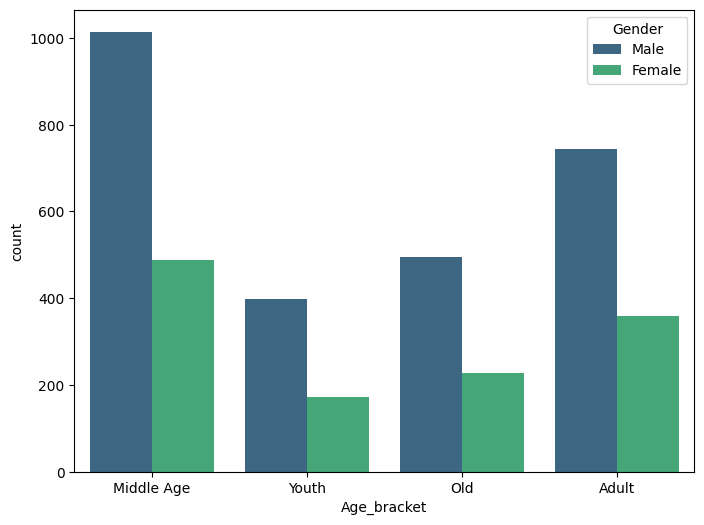

In [79]:

df['Age'].mean()
df['Gender'].unique()
df['Age_category'] = pd.cut(df['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults', 'old'] )
fig = px.histogram(df , y = 'Age' , x = 'Age_category')
fig.show()
#Age column
def age_bracket(age):
    if 18 <= age <= 25:
        return 'Youth'
    elif 0 <= age <= 18:
        return 'Teen'
    elif 26 <= age <= 40:
        return 'Adult'
    elif 41 <= age <= 60:
        return 'Middle Age'
    else:
        return 'Old'

# To create a new column in the table
df['Age_bracket'] = df['Age'].apply(age_bracket)
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_bracket', data=df, hue='Gender', palette='viridis')
plt.xlabel=('AGE_BRACKET')
plt.title=('Total Customer by gender')
plt.show()


**Insight**

Prominent age brackets, categorized by gender, reveal "Youth" as the largest group with balanced gender representation. The "Old" bracket is smaller, showing a higher proportion of females.

**Visualisation 4**

 Distribution of Payment Methods

Variables

Payment Method

Count of Payment Methods

Visualization Used

Pie Chart

Explanation:
The pie chart shows the percentage distribution of payment methods, with each slice sized by usage frequency. Labels and percentages highlight the share of each method, using a Viridis color palette for clarity and readability.

In [80]:
df.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

,Purchase Amount (USD)
Payment Method,
Debit Card,60.915094
Credit Card,60.074516
Bank Transfer,59.712418
Cash,59.704478
PayPal,59.245199
Venmo,58.949527


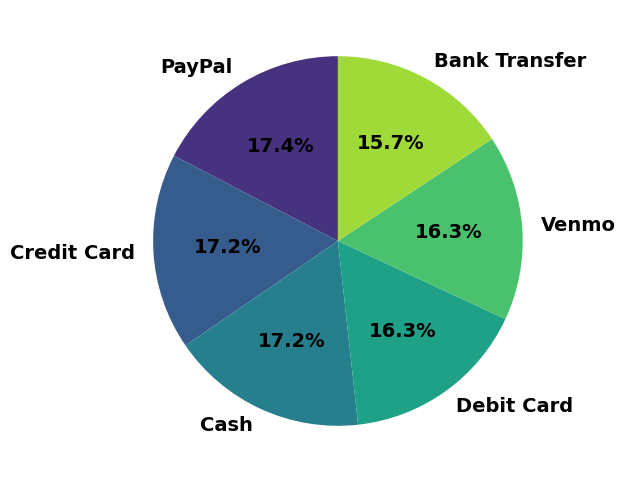

In [81]:
plt.figure(figsize=(6, 6))
payment_method_counts = df['Payment Method'].value_counts()
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('viridis'),textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title=('Distribution of Payment Methods')
plt.show()

**Insight**

The chart reveals the most and least preferred payment methods. A dominant slice suggests the popular choice, while smaller slices highlight less-used options. This can guide businesses in optimizing or promoting payment methods based on customer preferences.